# Heart Disease Prediction

This notebook will use ML classification models with scikit-learn piplines to make prediction.

In [10]:
# Import necessary tools

# EDA and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit Learn, we will try below 3 different models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


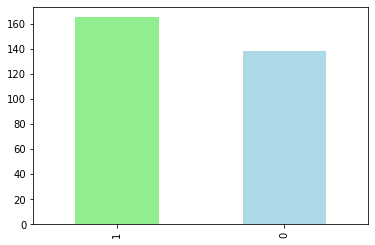

In [8]:
df.target.value_counts().plot(kind="bar", color=["lightgreen", "lightblue"]);

In [12]:
# Heart disease frequency as per sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0.5, 0, 'Target')

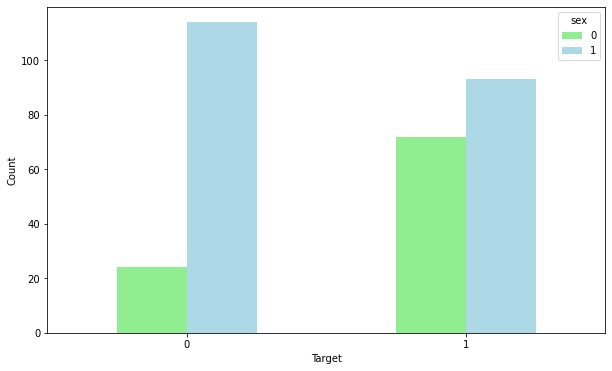

In [27]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightgreen", "lightblue"]);
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Target")

Text(0.5, 0.98, 'EDA Age vs Cholestrol/Thalach')

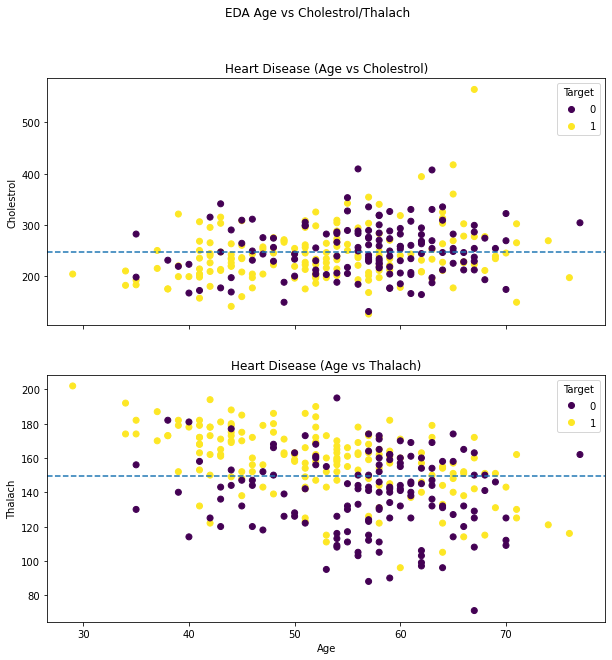

In [50]:
# Age vs Thalach(Max heart Rate)
figure, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# Plot Age vs Cholestrol on ax0
scatter = ax0.scatter(x=df.age, y=df.chol, c=df.target)
ax0.set(title="Heart Disease (Age vs Cholestrol)", ylabel="Cholestrol")
ax0.legend(*scatter.legend_elements(), title="Target")
# ax0.legend(["Positive", "Negative"])

# Add a horizontal line for mean value of Cholestrol
ax0.axhline(df.chol.mean(), linestyle="--")

# Plot Age vs Thalach on ax1
scatter1 = ax1.scatter(x=df.age, y=df.thalach, c=df.target)
ax1.set(title="Heart Disease (Age vs Thalach)", ylabel="Thalach", xlabel="Age")
ax1.legend(*scatter1.legend_elements(), title="Target")
ax1.axhline(df.thalach.mean(), linestyle="--")

# Add a title to Figure
figure.suptitle("EDA Age vs Cholestrol/Thalach")

[<matplotlib.lines.Line2D object at 0x000001E88ED45348>, <matplotlib.lines.Line2D object at 0x000001E88ED4FA08>] ['$\\mathdefault{0}$', '$\\mathdefault{1}$']
